<a href="https://colab.research.google.com/github/PraVikram/React_Project/blob/main/Auction_Verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)


Saving data.csv to data.csv


In [ ]:
print(df)

      process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                       0                    0                    2   
1                       0                    0                    2   
2                       0                    0                    2   
3                       0                    0                    2   
4                       0                    0                    2   
...                   ...                  ...                  ...   
2038                    2                    3                    2   
2039                    2                    3                    2   
2040                    2                    3                    2   
2041                    2                    3                    2   
2042                    2                    3                    2   

      process.b4.capacity  property.price  property.product  property.winner  \
0                       1              59                 1        

In [ ]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data.csv")

X = df.iloc[:, :-2]
y1 = df.iloc[:, -2]  
y2 = df.iloc[:, -1]

scaler = StandardScaler()
X.iloc[:, :4] = scaler.fit_transform(X.iloc[:, :4])

X = pd.get_dummies(X, columns=['property.winner'], prefix='winner')

y1 = pd.Series([1 if label == 'Yes' else 0 for label in y1])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')

X = df.iloc[:, :-2]
y = df['verification.result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8655256723716381


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')

X = df.iloc[:, :-2]
y = df['verification.result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9926650366748166


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')

X = df.iloc[:, :-2]
y = df['verification.result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9853300733496333


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('data.csv')

X = df.iloc[:, :-2]
y = df['verification.result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy score: 0.9773587737565899
Accuracy: 0.9877750611246944


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('data.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(['verification.result', 'verification.time'], axis=1), 
                                                    data['verification.result'], 
                                                    test_size=0.2, 
                                                    random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print('Linear Regression:')
print('Mean Squared Error: {:.4f}'.format(lr_mse))
print('R2 Score: {:.4f}'.format(lr_r2))
print()

print('Decision Tree Regression:')
print('Mean Squared Error: {:.4f}'.format(dt_mse))
print('R2 Score: {:.4f}'.format(dt_r2))
print()

print('Random Forest Regression:')
print('Mean Squared Error: {:.4f}'.format(rf_mse))
print('R2 Score: {:.4f}'.format(rf_r2))


Linear Regression:
Mean Squared Error: 0.1043
R2 Score: 0.1043

Decision Tree Regression:
Mean Squared Error: 0.0049
R2 Score: 0.9580

Random Forest Regression:
Mean Squared Error: 0.0034
R2 Score: 0.9707


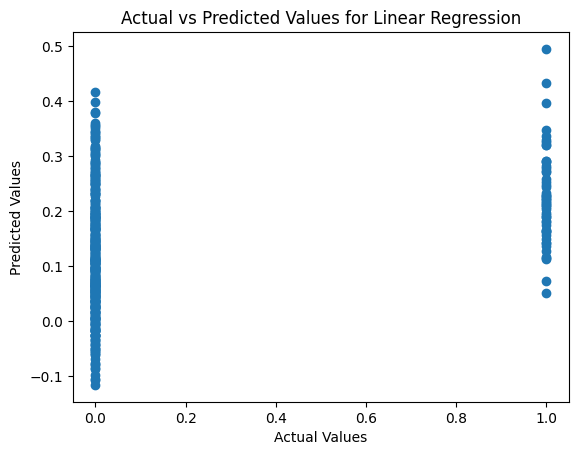

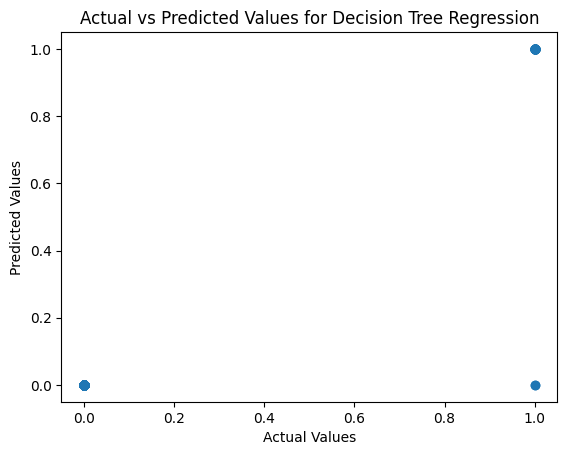

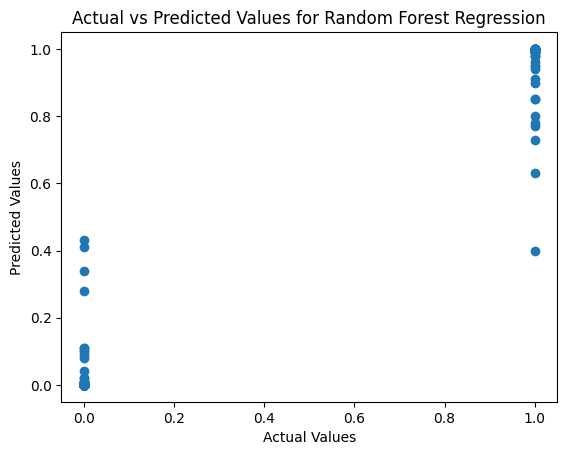

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('data.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(['verification.result', 'verification.time'], axis=1), 
                                                    data['verification.result'], 
                                                    test_size=0.2, 
                                                    random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.show()

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

plt.scatter(y_test, rf_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()
